In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets  
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    'images/Images',
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(256, 256),
    batch_size=64,
    label_mode='categorical'
)

val_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    'images/Images',
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(256, 256),
    batch_size=64,
    label_mode='categorical'
)


Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [3]:

# Preprocessing function for MobileNetV2
def preprocess(image, label):
    return preprocess_input(image), label

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.map(preprocess).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.map(preprocess).cache().prefetch(buffer_size=AUTOTUNE)


base_model = MobileNetV2(
    weights = None,
    include_top = False,
    input_shape = (256, 256, 3)
)

base_model.load_weights('mobilenetv2_imagenet.weights.h5')
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(120, activation='softmax')
])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_mobilenet_dog_model.keras', save_best_only=True)
]


Epoch 1/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.0979 - loss: 4.3850 - val_accuracy: 0.5090 - val_loss: 2.6905
Epoch 2/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.5779 - loss: 2.3264 - val_accuracy: 0.7009 - val_loss: 1.6273
Epoch 3/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.7392 - loss: 1.4310 - val_accuracy: 0.7609 - val_loss: 1.1809
Epoch 4/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.7963 - loss: 1.0408 - val_accuracy: 0.7869 - val_loss: 0.9653
Epoch 5/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.8259 - loss: 0.8401 - val_accuracy: 0.8039 - val_loss: 0.8434
Epoch 6/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.8422 - loss: 0.7189 - val_accuracy: 0.8090 - val_loss: 0.7662
Epoch 7/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.8549 - loss: 0.6366 - val_accuracy: 0.8139 - val_loss: 0.7132
Epoch 8/15
258/258 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.8651 - loss: 0.5760 - val_accu

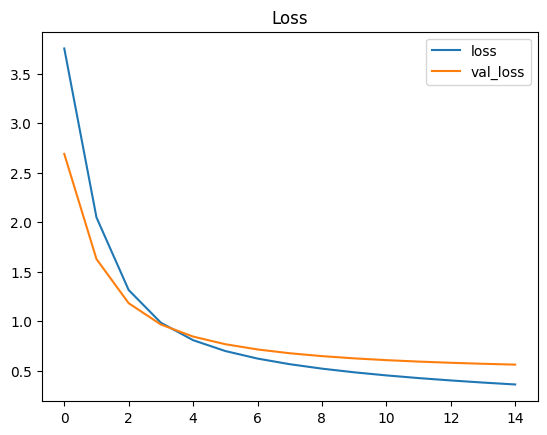

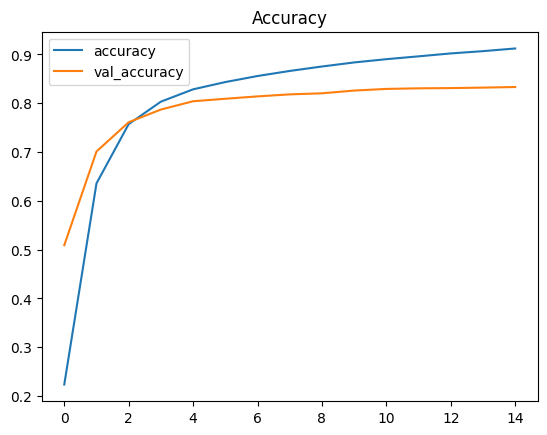

In [5]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)


model.save('DogBreed_MobileNet_model_256size_30epochs.h5')

# Plot training history
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot(title="Loss")
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.show()
